# 4. Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
dfm=pd.read_csv('../data/processed/netflix_processed.csv')

# Style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Set style for beautiful plots
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

NameError: name 'IMAGES_DIR' is not defined

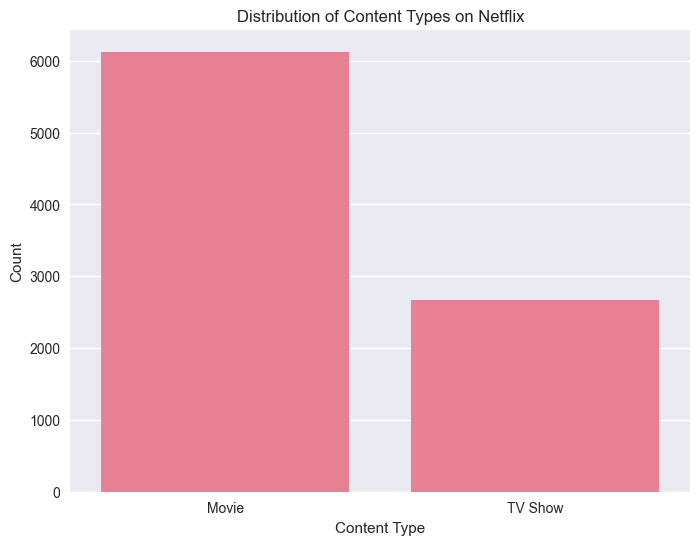

In [2]:
#Content Type Distribution: Movies vs TV Shows
plt.figure(figsize=(8,6))
sns.countplot(x='type', data=dfm)
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.savefig(IMAGES_DIR/"content_type_distribution.png", dpi=300, bbox_inches='tight') # type: ignore
plt.show()

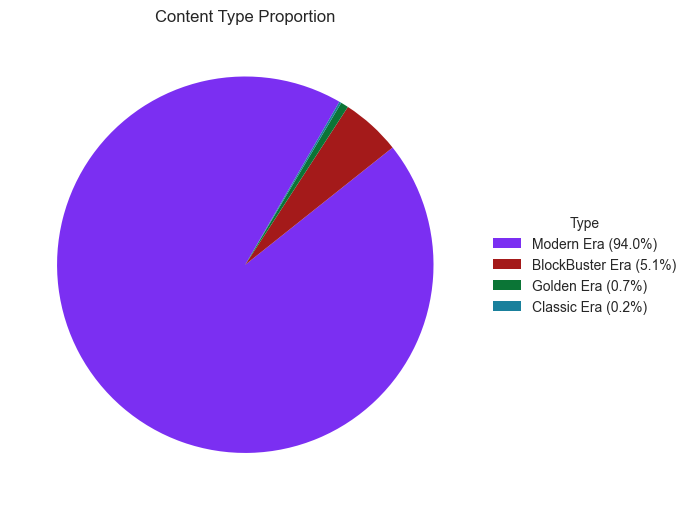

In [ ]:
#Pie Chart for Content Type Proportion
type_counts = dfm['time_line'].value_counts()
percentages = (type_counts / type_counts.sum() * 100).round(1)
labels_with_pct = [f"{label} ({pct}%)" for label, pct in zip(type_counts.index, percentages)]

plt.figure(figsize=(7,7))
wedges, texts = plt.pie(
    type_counts,
    labels=None, 
    startangle=60,
    colors=['#7b2ff2', '#a41a1a', '#0b7536', '#1a809c'],
    textprops={'fontsize': 13}
)
plt.title('Content Type Proportion')
plt.legend(wedges, labels_with_pct, title="Type", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(IMAGES_DIR/"content_type_proportion.png", dpi=300, bbox_inches='tight') # type: ignore
plt.show()


<Figure size 1200x600 with 0 Axes>

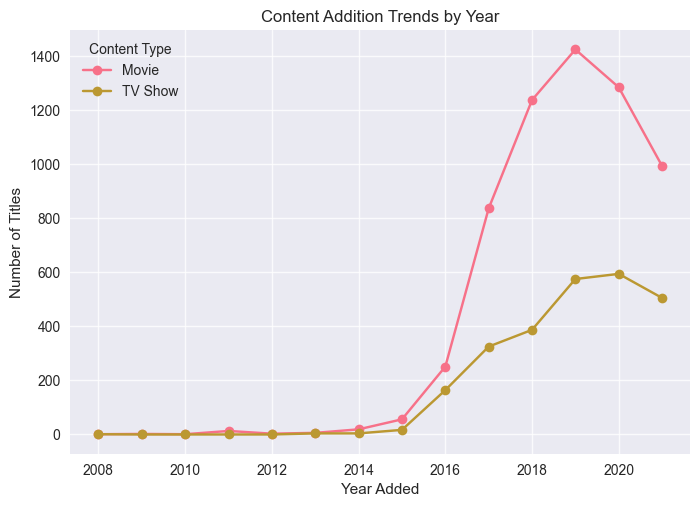

In [ ]:
#Content Added Over Time
yearly_counts = dfm.groupby(['added_year', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
yearly_counts.plot(kind='line', marker='o')
plt.title('Content Addition Trends by Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True, alpha=0.8)
plt.legend(title='Content Type')
plt.savefig(IMAGES_DIR/"content_added_over_time.png", dpi=300, bbox_inches='tight') # type: ignore
plt.show()

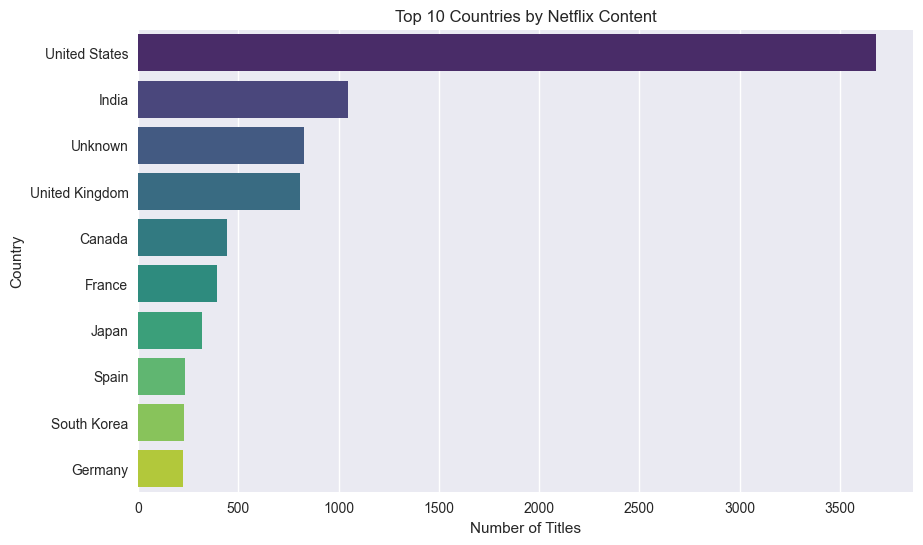

In [ ]:
#Top Countries by Content Production
all_countries = []
for countries in dfm['country']:
    country_list = [country.strip() for country in countries.split(',')]
    all_countries.extend(country_list)
country_counts = pd.Series(all_countries).value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index,hue=country_counts.index,palette='viridis')
plt.title('Top 10 Countries by Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.savefig(IMAGES_DIR/"top_countries_by_content_production.png", dpi=300, bbox_inches='tight') # type: ignore
plt.show()

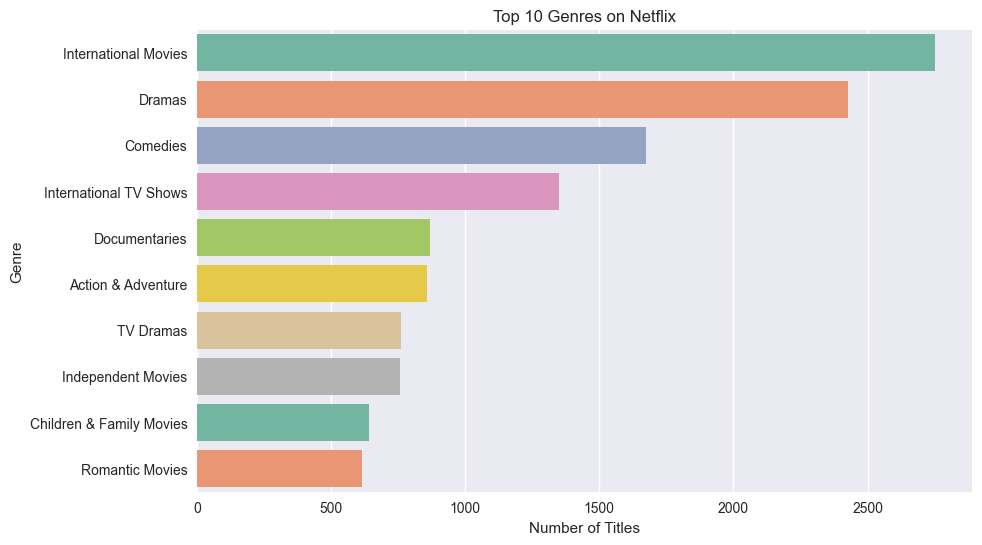

In [ ]:
# 4. Genre Distribution (Top 10 genres)
all_genres = []
for genres in dfm['listed_in']:
    genre_list = [genre.strip() for genre in genres.split(',')]
    all_genres.extend(genre_list)
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index,hue=genre_counts.index,palette='Set2')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.savefig(IMAGES_DIR/"genre_distribution.png", dpi=300, bbox_inches='tight') # type: ignore
plt.show()

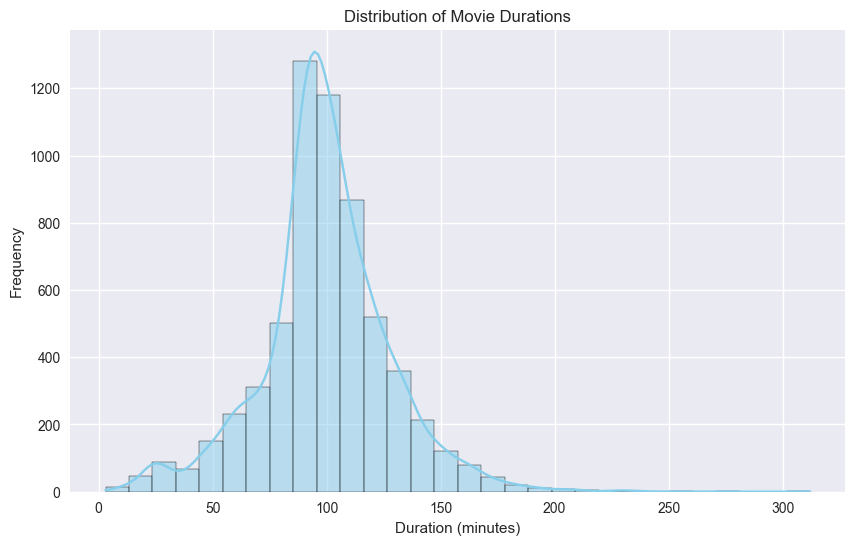

In [ ]:
# 5. Movie Duration Distribution
movies = dfm[dfm['type'] == 'Movie'].copy()
movies['duration_minutes'] = movies['duration'].str.extract(r'(\d+)').astype(float)
plt.figure(figsize=(10,6))
sns.histplot(movies['duration_minutes'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.savefig(IMAGES_DIR/"movie_duration_distribution.png", dpi=300, bbox_inches='tight') # type: ignore
plt.show()

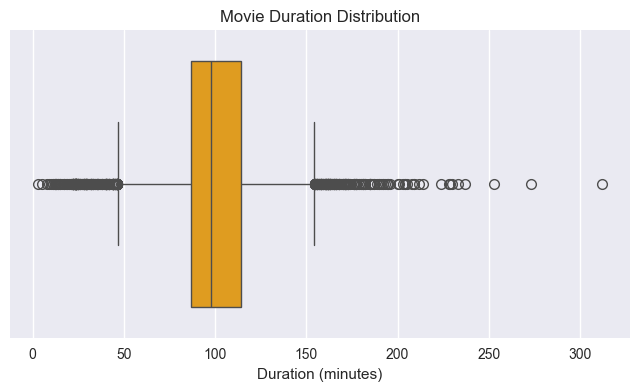

In [ ]:
# Boxplot for movie durations
plt.figure(figsize=(8,4))
sns.boxplot(x=movies['duration_minutes'].dropna(), color='orange')
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.savefig(IMAGES_DIR/"movie_duration.png", dpi=300, bbox_inches='tight') # type: ignore
plt.show()